In [10]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.preprocessing import add_dummy_feature
import matplotlib.pyplot as plt

In [14]:
# Load dataset
iris=load_iris()
X = iris.data[:, 0:1]   # Feature: sepal length (given) => all rows from 0 - 1 column excluding 1
y = iris.data[:, 2:3]   # Target: petal length (predict) => all rows from 2 - 3 column excluding 3

In [29]:
# add bias term
X_b = np.c_[np.ones((X.shape[0], 1)), X]   # bias first

In [30]:
# normal eq
# theta_best=np.linalg.inv(X_b.T @ X_b) @ (X_b.T @ y)
theta_pinv = np.linalg.pinv(X_b) @ y
print(theta_pinv)

[[-7.10144337]
 [ 1.85843298]]


In [31]:
X_new = np.array([[4], [8]])   # predict for sepal length 4 and 8
X_new_b = np.c_[np.ones((X_new.shape[0], 1)), X_new]  # bias first column
y_pred = X_new_b @ theta_pinv
print("Predictions:", y_pred)

Predictions: [[0.33228854]
 [7.76602046]]


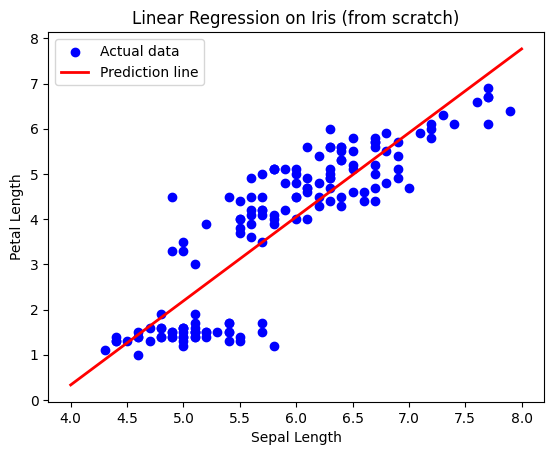

In [32]:
plt.scatter(X, y, color="blue", label="Actual data")
plt.plot(X_new, y_pred, "r-", linewidth=2, label="Prediction line")
plt.xlabel("Sepal Length")
plt.ylabel("Petal Length")
plt.title("Linear Regression on Iris (from scratch)")
plt.legend()
plt.show()

(150, 1)


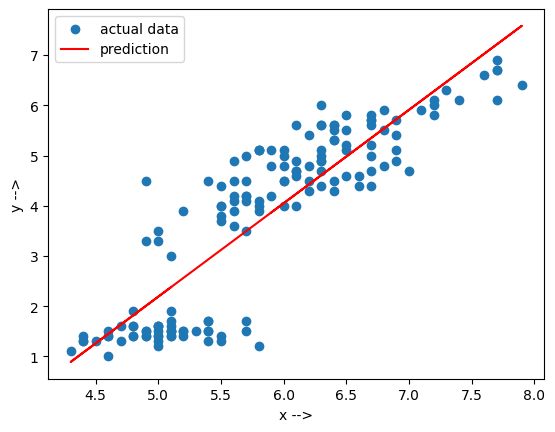

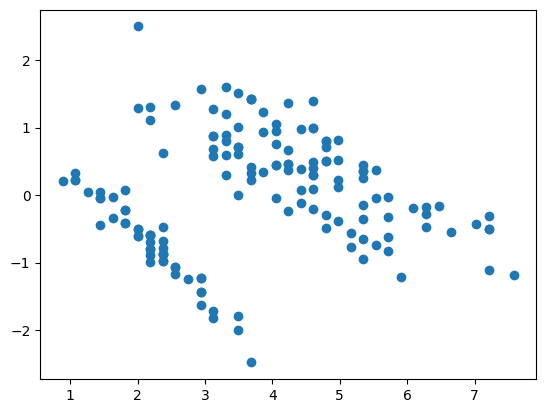

In [35]:
from sklearn.linear_model import LinearRegression
reg_model= LinearRegression()
X= X.reshape(-1,1)
print(X.shape)
reg_model.fit(X,y)
reg_model.score(X,y)
y_pred=reg_model.predict(X)
plt.scatter(X,y,label='actual data')
plt.plot(X,y_pred,'r', label='prediction')
plt.xlabel('x -->')
plt.ylabel('y -->')
plt.legend()
plt.show()
error= y-y_pred
sse= error**2
plt.scatter(y_pred,error)
# plt.plot(y_pred,y,'r')

In [36]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

kf = KFold(n_splits=5, shuffle=True, random_state=42)
mse_list = []

for train_idx, test_idx in kf.split(X):
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]
    
    # add bias
    X_train_b = np.c_[np.ones((X_train.shape[0],1)), X_train]
    X_test_b  = np.c_[np.ones((X_test.shape[0],1)), X_test]
    
    # compute theta
    theta = np.linalg.pinv(X_train_b) @ y_train
    
    # predict on test fold
    y_pred = X_test_b @ theta
    
    # compute MSE
    mse_list.append(mean_squared_error(y_test, y_pred))

print("MSE per fold:", mse_list)
print("Average MSE:", np.mean(mse_list))


MSE per fold: [0.5960765879745177, 0.875257858675777, 0.8287936076283465, 0.5488386055798143, 0.981764605364196]
Average MSE: 0.7661462530445302
